Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset (1).csv

📌 Decision Tree Regressor Results:
MAE: 0.10
MSE: 0.10
R² Score: 0.94

📌 Linear Regression Results:
MAE: 0.17
MSE: 0.07
R² Score: 0.96

📌 Support Vector Regressor Results:
MAE: 0.17
MSE: 0.07
R² Score: 0.96
⚠️ Augmenting data for XGBoost Regressor (R² = 0.73 < 0.9)
✅ Augmented R² Score for XGBoost Regressor: 0.81

📌 XGBoost Regressor Results:
MAE: 0.24
MSE: 0.47
R² Score: 0.81


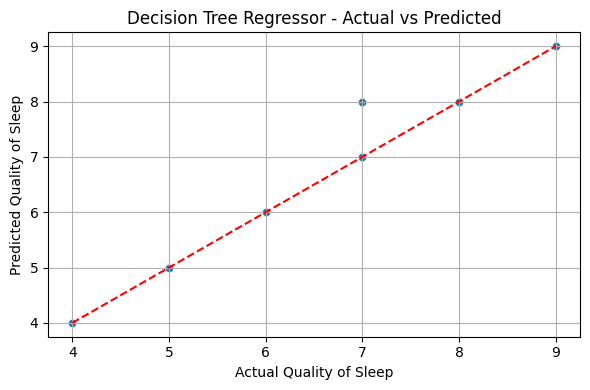

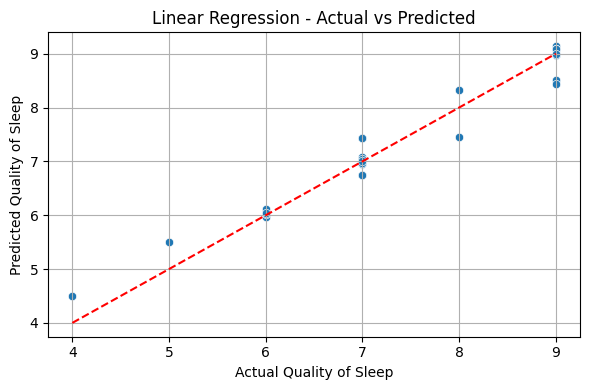

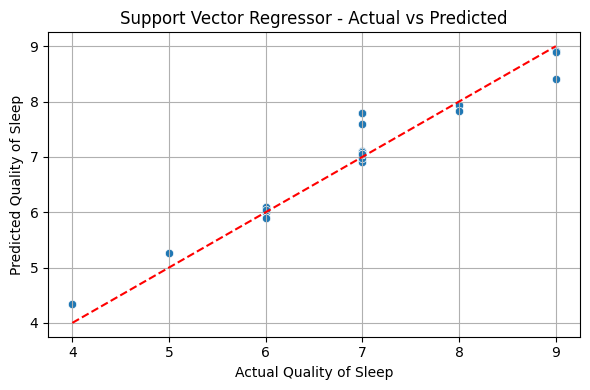

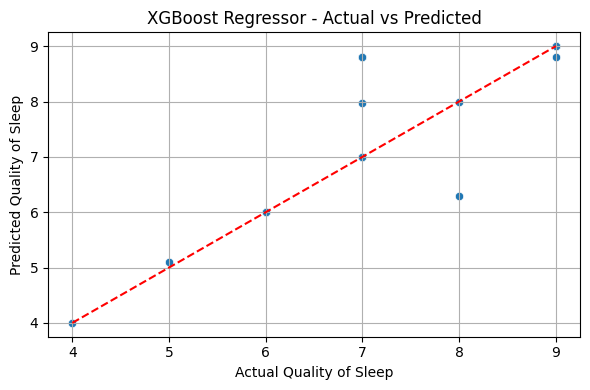


🏆 Best Model: Linear Regression with R² Score: 0.96


In [ ]:
# Step 1: Install required libraries
!pip install -q xgboost

# Step 2: Upload the CSV dataset manually
from google.colab import files
uploaded = files.upload()  # Upload the 'Sleep_health_and_lifestyle_dataset.csv' file here

# Step 3: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 4: Load dataset
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# Step 5: Preprocess 'Blood Pressure'
if 'Blood Pressure' in df.columns:
    df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
    df['Systolic'] = pd.to_numeric(df['Systolic'], errors='coerce')
    df['Diastolic'] = pd.to_numeric(df['Diastolic'], errors='coerce')
    df.drop(columns=['Blood Pressure'], inplace=True)

# Step 6: Encode categorical columns
le = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Sleep Disorder']
df[categorical_cols] = df[categorical_cols].apply(le.fit_transform)

# Step 7: Drop missing values
df.dropna(inplace=True)

# Step 8: Feature selection
features = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level',
            'BMI Category', 'Systolic', 'Diastolic', 'Heart Rate', 'Daily Steps']
target = 'Quality of Sleep'

X = df[features]
y = df[target]

# Step 9: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 11: Initialize models
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Linear Regression": LinearRegression(),
    "Support Vector Regressor": SVR(),
    "XGBoost Regressor": xgb.XGBRegressor(objective='reg:squarederror')
}

results = {}

# Step 12: Function to augment data
def augment_data(X, factor=0.1):
    noise = np.random.normal(0, factor, X.shape)
    return X + noise

# Step 13: Train, evaluate, and augment if needed
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store initial results
    results[name] = {
        "model": model,
        "MAE": mae,
        "MSE": mse,
        "R2": r2,
        "y_pred": y_pred
    }

    # Augmentation if needed
    if r2 < 0.9:
        print(f"⚠️ Augmenting data for {name} (R² = {r2:.2f} < 0.9)")
        X_train_aug = augment_data(X_train_scaled)
        model.fit(X_train_aug, y_train)
        y_pred_aug = model.predict(X_test_scaled)
        r2_aug = r2_score(y_test, y_pred_aug)

        # Store augmented predictions
        results[name]["R2"] = r2_aug
        results[name]["y_pred"] = y_pred_aug

        print(f"✅ Augmented R² Score for {name}: {r2_aug:.2f}")

    # Print model metrics
    print(f"\n📌 {name} Results:")
    print(f"MAE: {results[name]['MAE']:.2f}")
    print(f"MSE: {results[name]['MSE']:.2f}")
    print(f"R² Score: {results[name]['R2']:.2f}")

# Step 14: Visualizations for each model
for name, result in results.items():
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=result["y_pred"])
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.title(f"{name} - Actual vs Predicted")
    plt.xlabel("Actual Quality of Sleep")
    plt.ylabel("Predicted Quality of Sleep")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Step 15: Identify and display best model
best_model = max(results, key=lambda x: results[x]["R2"])
print(f"\n🏆 Best Model: {best_model} with R² Score: {results[best_model]['R2']:.2f}")